In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importieren der CSV

In [148]:
track_data = pd.read_csv('Rohdaten_Stündlich_QB_2024_06_06.csv', sep = ';')

In [149]:
track_data.head()

,CustomIntervall,Unnamed: 1,linecount Zugang Europaviertel,linecount Bahnsteig01,linecount Bahnsteig02,linecount Bahnsteig03,linecount Bahnsteig04,linecount Bahnsteig05,linecount Bahnsteig06,linecount Bahnsteig07,...,STG_QB04_Steg01,STG_Bonatz10_Steg01,STG_QB12_Steg02,STG_Bonatz13_Steg02,STG_Bonatz04,linecount Zugang Infoturm Stuttgart,linecount Zugang Schlossgarten,(AB) linecount Zugang Schlossgarten+ITS,Bahnsteige Gesamt angepasst,Steg 02 Gesamt
0,01.01.2023 00:00,NaN,362,155,68,39,253,193,0,303,...,0,0,0,0,942,0,49,0,1.344,942.0
1,01.01.2023 01:00,NaN,482,251,94,108,550,138,0,406,...,0,0,0,0,874,6,71,0,1.979,874.0
2,01.01.2023 02:00,NaN,402,136,103,75,257,164,0,490,...,0,0,0,0,628,4,42,0,1.509,628.0
3,01.01.2023 03:00,NaN,363,144,109,89,356,97,0,222,...,0,0,0,0,611,2,45,0,1.304,611.0
4,01.01.2023 04:00,NaN,430,193,81,56,273,263,0,271,...,0,0,0,0,689,2,31,0,1.426,689.0


### Filtern von nicht notwendigen Zeilen
Es ist für die Analyse nur der Zeitpunkt, sowie der Bahnsteig relevant. 

In [150]:
# Spaltennamen anzeigen
print(track_data.columns)

Index(['CustomIntervall', 'Unnamed: 1', ' linecount Zugang Europaviertel',
       ' linecount Bahnsteig01', ' linecount Bahnsteig02',
       ' linecount Bahnsteig03', ' linecount Bahnsteig04',
       ' linecount Bahnsteig05', ' linecount Bahnsteig06',
       ' linecount Bahnsteig07', ' linecount Bahnsteig08', ' Querbahnsteig',
       ' STG_QB04_Steg01', ' STG_Bonatz10_Steg01', ' STG_QB12_Steg02',
       ' STG_Bonatz13_Steg02', ' STG_Bonatz04',
       ' linecount Zugang Infoturm Stuttgart',
       ' linecount Zugang Schlossgarten',
       ' (AB) linecount Zugang Schlossgarten+ITS',
       'Bahnsteige Gesamt angepasst', 'Steg 02 Gesamt'],
      dtype='object')


In [151]:
# Auswahl der gewünschten Spalten anhand der tatsächlich vorhandenen Spaltennamen
selected_columns = ['CustomIntervall', ' linecount Bahnsteig01', ' linecount Bahnsteig02', ' linecount Bahnsteig03', ' linecount Bahnsteig04', ' linecount Bahnsteig05', ' linecount Bahnsteig07', ' linecount Bahnsteig08']
filtered_data = track_data[selected_columns].copy()  # Explizit eine Kopie erstellen

# Sicherstellen, dass das Datum korrekt als Datetime-Typ eingelesen wird
filtered_data['CustomIntervall'] = pd.to_datetime(filtered_data['CustomIntervall'], format='%d.%m.%Y %H:%M')
filtered_data.set_index('CustomIntervall', inplace=True)

# Das gefilterte DataFrame anzeigen
filtered_data.head()

,linecount Bahnsteig01,linecount Bahnsteig02,linecount Bahnsteig03,linecount Bahnsteig04,linecount Bahnsteig05,linecount Bahnsteig07,linecount Bahnsteig08
CustomIntervall,,,,,,,
2023-01-01 00:00:00,155,68,39,253,193,303,333
2023-01-01 01:00:00,251,94,108,550,138,406,432
2023-01-01 02:00:00,136,103,75,257,164,490,284
2023-01-01 03:00:00,144,109,89,356,97,222,287
2023-01-01 04:00:00,193,81,56,273,263,271,289


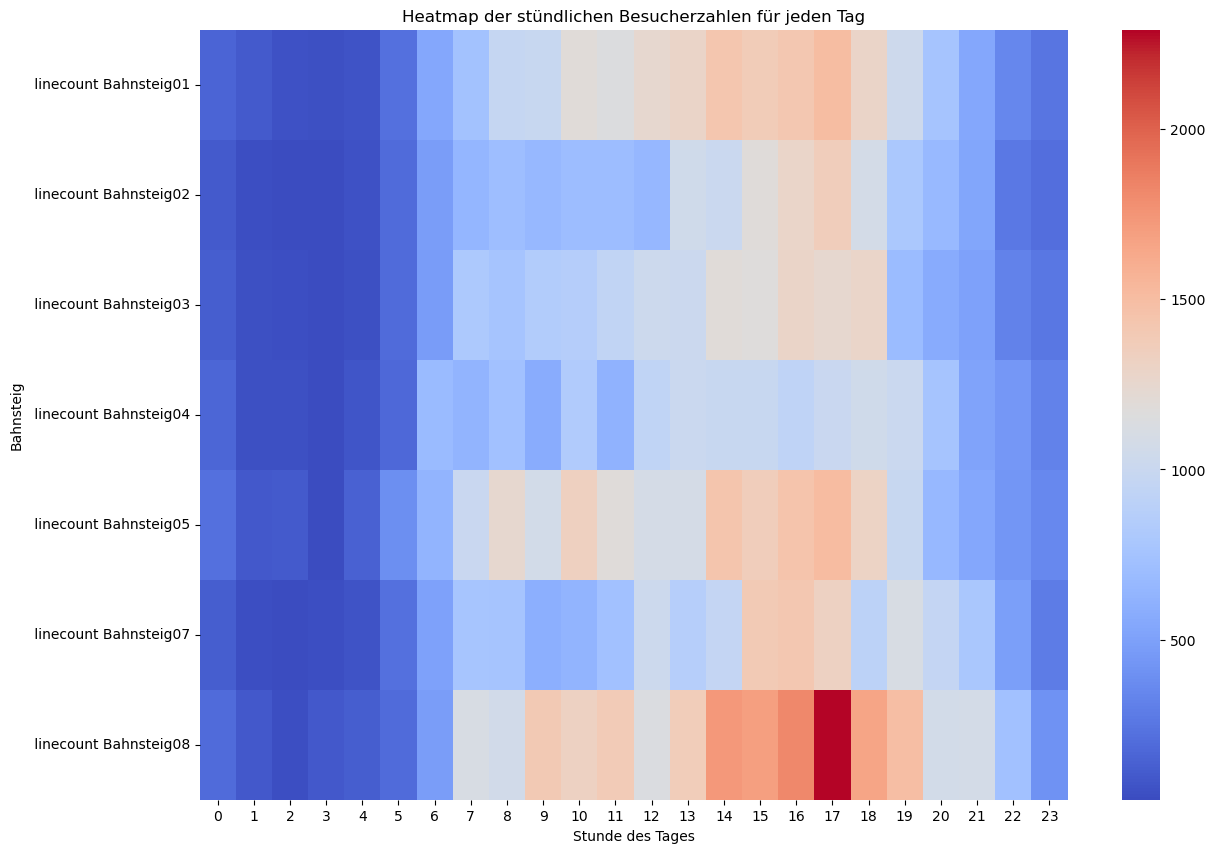

In [152]:
# Resampling der Daten, um stündliche Mittelwerte zu berechnen
hourly_data = filtered_data.resample('H').mean()

# Umstrukturieren der Daten für die Heatmap (Bahnsteige als Zeilen, Stunden als Spalten)
hourly_data_pivot = hourly_data.pivot_table(values=[' linecount Bahnsteig01', ' linecount Bahnsteig02', ' linecount Bahnsteig03', ' linecount Bahnsteig04', ' linecount Bahnsteig05', ' linecount Bahnsteig07', ' linecount Bahnsteig08'], index=hourly_data.index.hour)

# Erstellen der Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(hourly_data_pivot.T, cmap="coolwarm", annot=False)
plt.title('Heatmap der stündlichen Besucherzahlen für jeden Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Bahnsteig')
plt.show()